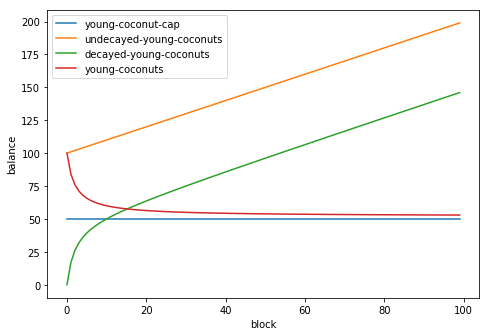

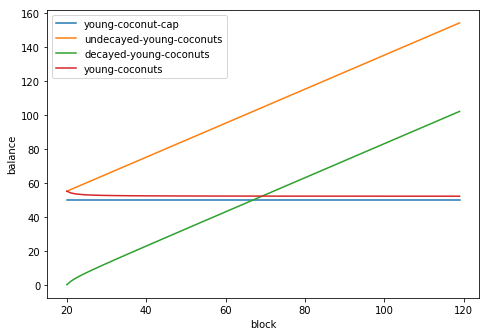

In [57]:
from matplotlib import pyplot as plt
import numpy as np
import math

%matplotlib inline


# Math helpers

def saturating_sub(a, b):
    c = a - b
    if c < 0:
        c = 0
    return c


# Model constants

COCONUTS_PER_BLOCK_PER_TREE = 1
COCONUT_CAP_PER_TREE = 50
COCONUT_DECAY_RATE = 0.5


# Model functions

def produced_young_coconuts(state, block_index):
    snapshot_block_index = state['snapshot_block_index']
    diff_block_index = block_index - snapshot_block_index
    snapshot_coconut_tree_count = state['snapshot_coconut_tree_count']
    coconuts_per_block = snapshot_coconut_tree_count * COCONUTS_PER_BLOCK_PER_TREE
    coconuts_since_snapshot = diff_block_index * coconuts_per_block
    return coconuts_since_snapshot

def undecayed_young_coconuts(state, block_index):
    produced_young_coconuts0 = produced_young_coconuts(state, block_index)
    snapshot_young_coconuts = state['snapshot_young_coconuts']
    total = produced_young_coconuts0 + snapshot_young_coconuts
    return total

def young_coconut_cap(state, block_index):
    snapshot_coconut_tree_count = state['snapshot_coconut_tree_count']
    total = snapshot_coconut_tree_count * COCONUT_CAP_PER_TREE
    return total

def decayed_young_coconuts(state, block_index):
    snapshot_block_index = state['snapshot_block_index']
    diff_block_index = block_index - snapshot_block_index
    produced_young_coconuts0 = produced_young_coconuts(state, block_index)

    undecayed_young_coconuts0 = undecayed_young_coconuts(state, block_index)
    young_coconut_cap0 = young_coconut_cap(state, block_index)
    diff = saturating_sub(undecayed_young_coconuts0, young_coconut_cap0)
    sub = undecayed_young_coconuts0 - diff / (diff_block_index * COCONUT_DECAY_RATE + 1)
    total = sub - young_coconut_cap0
    return total

def young_coconuts(state, block_index):
    undecayed_young_coconuts0 = undecayed_young_coconuts(state, block_index)
    decayed_young_coconuts0 = decayed_young_coconuts(state, block_index)
    total = undecayed_young_coconuts0 - decayed_young_coconuts0
    return total

def brown_coconuts(state, block_index):
    decayed_young_coconuts0 = decayed_young_coconuts(state, block_index)
    snapshot_brown_coconuts = state['snapshot_brown_coconuts']
    total = snapshot_brown_coconuts + decayed_young_coconuts0
    return total


# Plotting

PLOT_BLOCKS = 100

def plot(state):

    x_start = state['snapshot_block_index']
    x_end = state['snapshot_block_index'] + PLOT_BLOCKS

    x = np.arange(x_start, x_end)
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    
    def plot_one(f, label):
        f_bound = lambda xx: f(state, xx)
        y = np.array(list(map(f_bound, x)))
        ax.plot(x, y, label=label)
    
    #plot_one(produced_young_coconuts, label="produced-young-coconuts")
    plot_one(young_coconut_cap, label="young-coconut-cap")
    plot_one(undecayed_young_coconuts, label="undecayed-young-coconuts")
    plot_one(decayed_young_coconuts, label="decayed-young-coconuts")
    plot_one(young_coconuts, label="young-coconuts")
    #plot_one(brown_coconuts, label="brown-coconuts")

    ax.set_xlabel("block")
    ax.set_ylabel("balance")
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    
# Experiments
    
state = {
    'snapshot_block_index': 0,
    'snapshot_coconut_tree_count': 1,
    'snapshot_young_coconuts': 100,
    'snapshot_brown_coconuts': 10,
}

plot(state)

state = {
    'snapshot_block_index': 20,
    'snapshot_coconut_tree_count': 1,
    'snapshot_young_coconuts': 55,
    'snapshot_brown_coconuts': 10,
}

plot(state)